# 累積分布関数のお話

## Define empirical distribution function

未知の確率分布から生成された $n$ 個のデータ $X^n=(X_1,\dots,X_n)$ から定義される経験累積分布関数(empirical distribution function) を次で定義する:

$$
\hat{F}(x) = \frac{1}{n} \sum_{i=1}^n I(X_i \leq x)
$$

ここで $I(X_i\leq x)$ は次で与えられる定義関数(indicator function) とする

$$
I(X_i \leq x ) := 
    \begin{cases}
        1 \quad \textrm{if}\ X_i \leq x) \\
        0 \quad \textrm{otherwise}
    \end{cases}
$$

## Julia で実装

In [9]:
using Distributions
using Plots

In [10]:
N = 100 # num of sample
d = Normal(8., 1.)
Xᴺ = rand(d,N);

In [11]:
F̂(x) = sum(Xᴺ .<= x)/N

F̂ (generic function with 1 method)

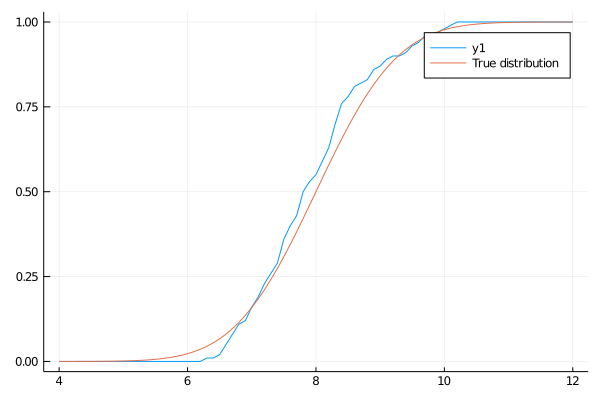

In [12]:
x = range(4,stop=12,step=0.1)
plot(x, F̂.(x))
plot!(x, cdf.(d,x), label="True distribution")

# 複数のサンプル数で確認

サンプル数が大きくなると真の分布の累積分布関数に近づくことがわかる。

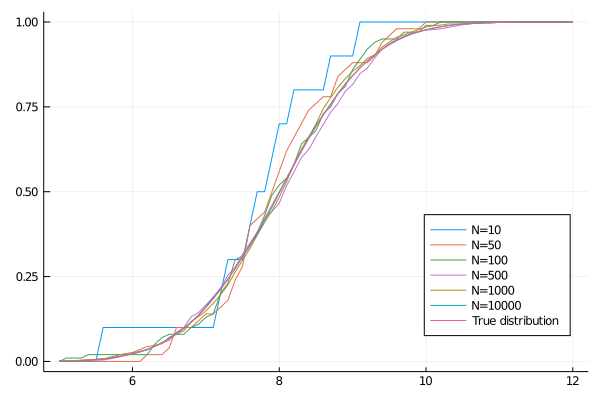

In [13]:
p = plot()
x = range(5,stop=12,step=0.1)
for N in [10,50, 100,500,1000,10000]
    d = Normal(8., 1.)
    Xᴺ = rand(d,N);
    F̂(x) = sum(Xᴺ .<= x)/N
    plot!(p, x, F̂.(x), label="N=$N",legend=:bottomright)
end

plot!(p, x, cdf.(d,x), label="True distribution")

# 経験累積分布関数と一様乱数を用いてもとの分布を数値的に得る.

- 経験累積分布関数は（その定義により） 0 と 1 の間に値を持つ単調増加な関数である. 0 と 1 の間に値をとる一様乱数を発生させ
経験累積分布関数による逆像の値が分布からサンプルを取ったことに対応している。

In [17]:
N = 100000
Xᴺ = rand(d,N)
F̂(x) = sum(Xᴺ .<= x)/N
domcdf = collect(range(4,12,length=10000))
imcdf = F̂.(domcdf);

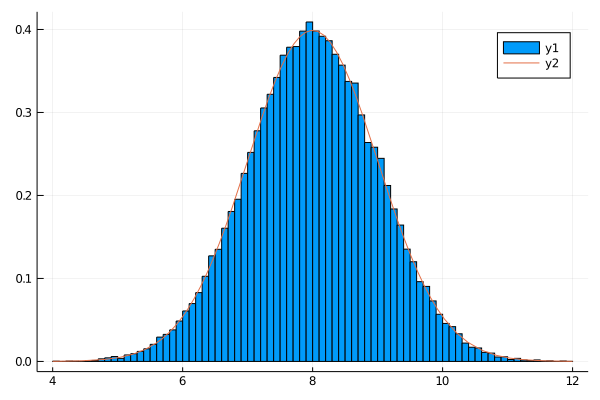

In [15]:
xs = Float64[]
M = length(domcdf)
for trial in 1:100000
    y = rand()
    idx = searchsortedfirst(imcdf, y)
    if idx <= M
        x = domcdf[idx]
        push!(xs, x)
    end
end

p = plot()
histogram!(p, xs, normalize=:pdf)
plot!(p, x->pdf(d, x),xlim=[4,12]) # 真の分布の密度関数を出力